## Stacks batch 4 - pipeline meristics

This notebook contains read counts, loci counts, and other basic meristics / analyses to summarize and visualize data throughout the `stacks` pipeline.


### process_radtags, r1

Reads per individual, counted as the number of lines in a fastq file divided by 4:

![img](https://github.com/mfisher5/PCod-Korea-repo/blob/master/nb_pictures/Batch4_PipelineMeristics_fastq_readCounts.png?raw=true)



### ustacks, r1

Tags (ie loci) per individual, counted as the number of consensus sequences in the .tags.tsv file:

![tags graph](https://github.com/mfisher5/PCod-Korea-repo/blob/master/nb_pictures/Batch4_PipelineMeristics_ustacks_tagCounts.png?raw=true)

### Number of tags v. number of reads


If we choose our catalog individuals based on number of tags or based on number of reads, are we choosing similar individuals?

In [1]:
cd ../pipeline_analyses/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/pipeline_analyses


In [2]:
countsfile = open("readsVtags.txt")

samples = []
n_reads = []
n_tags = []

for line in countsfile: 
    if "sample" not in line:
        sample = line.strip().split()[0]
        tags = line.strip().split()[1]
        reads = line.strip().split()[2]
        samples.append(sample)
        n_reads.append(reads)
        n_tags.append(tags)
print len(samples), len(n_reads), len(n_tags)

264 264 264


In [3]:
import numpy as np
import matplotlib.pyplot as plt

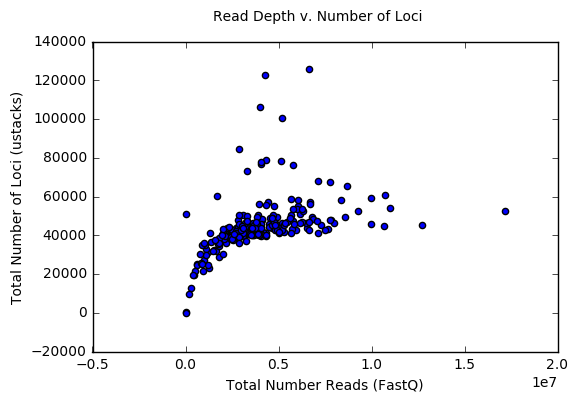

In [4]:
plt.scatter(n_reads, n_tags)
plt.suptitle("Read Depth v. Number of Loci")
plt.xlabel("Total Number Reads (FastQ)")
plt.ylabel("Total Number of Loci (ustacks)")
plt.show()

In [5]:
plt.close()


<br>
Short answer: not really.

<br>

**Where do the individuals who end up missing data for 20% or more loci fall on this plot?**

In [6]:
myfile = open("missing_data_b4r1.txt", "r")

sample_list = []
reads_list = []
tags_list = []
missing_list = []
remove_list = []

for line in myfile:
    if "sample" not in line:
        sample_list.append(line.strip().split()[0])
        tags_list.append(line.strip().split()[1])
        reads_list.append(line.strip().split()[2])
        missing_list.append(float(line.strip().split()[3]))
        if int(line.strip().split()[4]) == 1: 
            remove_list.append(line.strip().split()[0])
print remove_list
print "---"
print "May have to remove ", len(remove_list), " samples"
myfile.close()

['YS_121316_29', 'JUK07_25', 'JB121807_04.1', 'JB121807_05', 'JB121807_07.1', 'JB121807_09.1', 'JB121807_12.1', 'JB121807_16.1', 'JB121807_23', 'JB121807_25', 'JB121807_27', 'JB121807_30', 'JB121807_30.1', 'JB121807_35', 'JB121807_41.1', 'JB121807_42', 'JB121807_45.1', 'JB121807_47', 'JB121807_48.1', 'JB021108_10.1', 'JB021108_11', 'JB021108_14', 'JB021108_25.1', 'JB021108_28', 'JB021108_31.1', 'JB021108_33', 'JB021108_38.1', 'JB021108_40', 'BOR07_01', 'BOR07_21.1', 'GEO020414_10', 'GEO020414_13', 'GEO020414_15_300', 'GEO020414_30']
---
May have to remove  34  samples


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

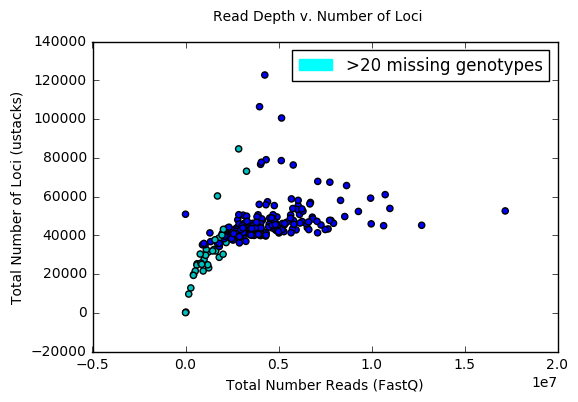

In [8]:
myfile = open("missing_data_b4r1.txt", "r")
color_list = []
for line in myfile:
    if "sample" not in line:
        if int(line.strip().split()[4]) == 1:
            color_list.append("c")
        elif int(line.strip().split()[4]) == 0:
            color_list.append("b")
myfile.close()
plt.scatter(reads_list, tags_list, c = color_list)
plt.suptitle("Read Depth v. Number of Loci")
plt.xlabel("Total Number Reads (FastQ)")
plt.ylabel("Total Number of Loci (ustacks)")
remove_patch = mpatches.Patch(color = 'cyan', label = ">20 missing genotypes")
plt.legend(handles = [remove_patch])
plt.show()

<br>

### cstacks, r1

In [1]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/notebooks'

In [2]:
cd ../stacks_b4

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/stacks_b4


In [6]:
!grep "consensus" batch_4.catalog.tags.tsv | wc -l

533526


There are **533,526 loci** in the cstacks catalog (r1)

<br>

### sstacks




<br>
<br>
<br>

### populations

In [9]:
cd ../scripts

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/scripts


In [14]:
!python UniqueLocusCount.py ../stacks_b4/batch_4.genepop

Stacks version 1.44; Genepop version 4.1.3; April 30, 2017

Done reading loci

The number of unique loci in  ../stacks_b4/batch_4.genepop is:  25569


There are **25,569 loci** in the `populations` output genepop file. 

<br>


### Reference Genome

after BOWTIE filtering:

after BLAST filtering:

<br>

### pstacks

I want to see if the distribution of tags v. read depth shown above for `ustacks` is also seen after `pstacks`. 

In [1]:
cd ../scripts

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/scripts


In [ ]:
#run at command line since it prints each sample name to notebook
!python countloci_tagsfiles.py \
-s ../analyses/final_individuals.txt \
-d ../batch_4_wgenome \
-o ../pipeline_analyses/pstacks_tagsfiles_locicounts.txt

Using pre-existing read counts, I created another readsVtags text file.

In [3]:
cd ../pipeline_analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/pipeline_analyses


In [5]:
countsfile = open("pstacks_readsVtags.txt")

samples = []
n_reads = []
n_tags = []

for line in countsfile: 
    if "sample" not in line:
        sample = line.strip().split()[0]
        tags = line.strip().split()[1]
        reads = line.strip().split()[2]
        samples.append(sample)
        n_reads.append(reads)
        n_tags.append(tags)
print len(samples), len(n_reads), len(n_tags)

234 234 234


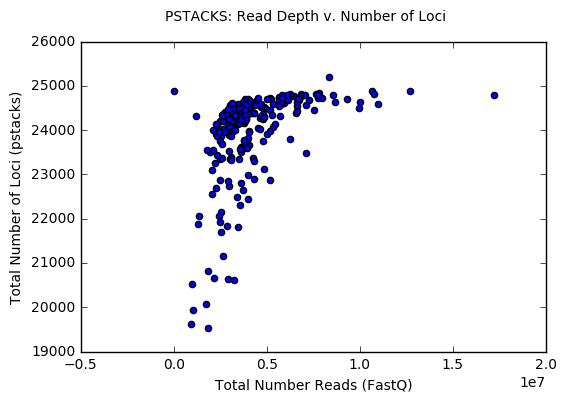

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(n_reads, n_tags)
plt.suptitle("PSTACKS: Read Depth v. Number of Loci")
plt.xlabel("Total Number Reads (FastQ)")
plt.ylabel("Total Number of Loci (pstacks)")
plt.show()

In [7]:
plt.close()

In [32]:
print "These are the samples with fewer than 22000 loci in the pstacks tags file:"
for i in range(0, len(n_tags)):
    if float(n_tags[i]) < 23000:
        print samples[i]

These are the samples with fewer than 22000 loci in the pstacks tags file:
GE011215_29.1
NA021015_08.1
YS_121316_28
YS_121316_29
YS121315_10.1
JUK07_17
JUK07_22
JUK07_25
JUK07_28
JB121807_14.1
JB121807_21.1
JB121807_28.1
JB121807_32.1
JB121807_33.1
JB121807_38.1
JB121807_42
JB121807_46
JB021108_02.1
JB021108_04.1
JB021108_08.1
JB021108_20
JB021108_22.1
JB021108_26.1
JB021108_29
JB021108_34
JB021108_35
JB021108_35_rep
JB021108_39
JB021108_41.1
BOR07_19.1
GEO020414_15_300





<br>



### cstacks, r2

In [18]:
cd ../batch_4_wgenome/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/batch_4_wgenome


In [19]:
!grep "consensus" batch_4.catalog.tags.tsv | wc -l

25569


There are **25,569 loci** in the cstacks catalog (r2)

<br>

### populations

In [20]:
cd ../scripts/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/scripts


In [21]:
!python UniqueLocusCount.py ../batch_4_wgenome/batch_4.genepop

Stacks version 1.44; Genepop version 4.1.3; May 06, 2017

Done reading loci

The number of unique loci in  ../batch_4_wgenome/batch_4.genepop is:  22395


There are **22,395 loci** left after populations, r2.
<br>
<br>
<br>


### post-stacks filtering
<br>
**Marine's filtering / genotype correcting script**: 9,860 loci

<br>
**MAF filtering**: 7,999 loci

<br>
**Missing Data filtering (must have  less than 20% missing)**: 7,663 loci